### Ejercicio para clase 8
# ML Strategy

# Ciencia de Datos - Ingeniería Industrial - UTN BA

## Elaborado por Manuel Sabini y Valentin Tudanca

Parte del ejercicio fue elaborado con fragmentos de codigo de otros ejercicios realizados en clase

In [1]:
# inicialmente cargamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#SK-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
#Scalers
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Modelos Lineales
# https://scikit-learn.org/stable/modules/linear_model.html
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.svm import SVR
#Metricas
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Cargamos ambos datasets

In [2]:
entrenamiento = pd.read_csv(r"C:\Users\Manuel\Documents\UTN\Electivas\Ciencia de Datos\Ejercicio\Xy_train.csv")
entrenamiento.head()

,X,y
0,2.273360,6.054685
1,3.167583,4.581428
2,7.973655,5.392507
3,6.762547,3.108068
4,3.911096,4.225744


In [3]:
predecir = pd.read_csv(r"C:\Users\Manuel\Documents\UTN\Electivas\Ciencia de Datos\Ejercicio\X_test.csv")
predecir.head()

,X
0,6.170800
1,6.302022
2,8.689293
3,2.376897
4,2.707320


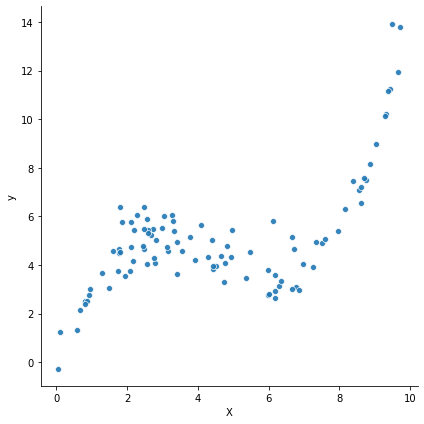

In [4]:
sns.relplot(x="X", y="y",
            sizes=(40, 400), alpha=0.9,
            height=6, data=entrenamiento)

Analizamos como se comportan los datos de entrenamiento y podemos ver que existe cierta funcion de al menos grado 3 que puede explicar la curva, aunque una regresion lineal tambien podria explicarla por el comportamiento creciente de esta. Pero vamos a realizar la prediccion usando un modelo de linear Regresion con features polinomicas de grado 3.

Estamos analizando solo los datos de entrenamiento.

Ahora vamos a dividir el dataset en 2, dividirlo en train y test y posteriormente escalar los X. 

En la divicion del dataset de train decidimos solo dejar un 20% de ellos para testear debido a que el dataset tiene pocos valores.

In [5]:
xentrenamiento = entrenamiento.iloc[:,:-1].values
yentrenamiento = entrenamiento.iloc[:,-1].values
print(xentrenamiento.shape,yentrenamiento.shape)

(100, 1) (100,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(xentrenamiento,yentrenamiento, test_size=0.2, random_state=13)

In [7]:
scaler = MinMaxScaler() 
scaler = scaler.fit(x_train)

In [8]:
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled.shape

(80, 1)

In [9]:
# Aqui estamos agregando las features polinomicas LUEGO de escalar los datos
grad_poly = 3
x_train_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_train_scaled)
x_test_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(x_test_scaled)
x_train_poly_scaled.shape

(80, 4)

In [10]:
#Definimos el estimador
est = LinearRegression()
#Definimos diccionario con hyperparametros
parameters = {'fit_intercept' : [False, True]}
#Definimos la cantidad de folds para validar
n_folds = 4
#Definimos el objeto grid search con los parametros anteriores
gs = GridSearchCV(est, param_grid=parameters, cv=n_folds, refit=True, scoring="neg_mean_squared_error")

In [11]:
gs.fit(x_train_poly_scaled, y_train)
print(gs.best_estimator_, "\n")
print(gs.best_params_, "\n")
print(gs.best_score_, "\n")

LinearRegression() 

{'fit_intercept': True} 

-0.5998833999950384 



In [12]:
# Predecimos para el set polinomico
poly_linear_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
# Calculamos las metricas R2,MSE y MAE
poly_linear_r2 = r2_score(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mse = mean_squared_error(y_true=y_test, y_pred=poly_linear_prediction)
poly_linear_mae = mean_absolute_error(y_true=y_test, y_pred=poly_linear_prediction)
print(f'MSE: {poly_linear_mse:.6f}')

MSE: 0.675170


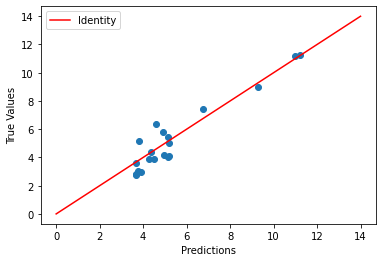

In [13]:
plt.scatter(poly_linear_prediction, y_test)
plt.plot(np.arange(0,15),np.arange(0,15), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()

Nuestro Mean squere Error quedo bastante bien, cuanto mas cerca de 0 este este mejor

Escalamos nuestra tabla de X a predecir y predecimos.

In [14]:
xpred_scaled = scaler.transform(predecir)
xpred_poly_scaled = PolynomialFeatures(grad_poly).fit_transform(xpred_scaled)
xpred_poly_scaled.shape

(20, 4)

In [15]:
predicciones_lineal = gs.best_estimator_.predict(xpred_poly_scaled)
predicciones_lineal

array([3.66712497, 3.67543852, 7.81673705, 5.08439927, 5.19353278,
       3.73817429, 7.10192331, 0.02140564, 9.68959459, 5.18783624,
       5.15736453, 3.69571718, 9.87185625, 2.10695463, 4.32748092,
       5.93777195, 4.13726616, 3.6766085 , 4.16773448, 3.67293938])

 Las de arriba son nuestras predicciones

# Anexo con otros modelos

# Linear

In [16]:
gs.fit(x_train_scaled, y_train)
# Usamos x_test para predecir con el mejor estimador
linear_prediction = gs.best_estimator_.predict(x_test_scaled)
#Calculamos las metricas R2, MSE y MAE
linear_r2 = r2_score(y_true=y_test, y_pred=linear_prediction)
linear_mse = mean_squared_error(y_true=y_test, y_pred=linear_prediction)
linear_mae = mean_absolute_error(y_true=y_test, y_pred=linear_prediction)
print(f'R2 score: {linear_r2:.6f}')
print(f'MSE: {linear_mse:.6f}')
print(f'MAE: {linear_mae:.6f}')

R2 score: 0.203125
MSE: 4.975165
MAE: 1.866571


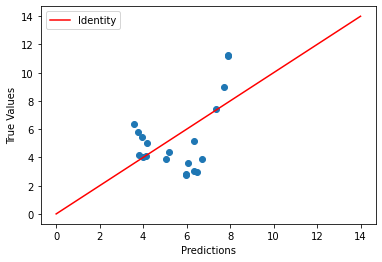

In [17]:
plt.scatter(linear_prediction, y_test)
plt.plot(np.arange(0,15),np.arange(0,15), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()

# SVR

In [18]:
# Ahora cambiamos el estimador, usaremos SVR
est = SVR(max_iter=25000)
# Lista del parametro lambda (parametro 'alpha')
parameters = {'C' : [1000,1500,2000,3000,5000],
              'epsilon' : [0.001, 0.01, 0.1,1, 10,100],
             'gamma':[0.001, 0.01, 0.1,1, 10,100]}
# Definimos nuevamente el objeto GS con los parametros previamente definidos
gs = GridSearchCV(est, param_grid=parameters,refit=True,
                  cv=n_folds, scoring="neg_mean_squared_error",
                  verbose=3, n_jobs=3)

### Linear

In [19]:
gs.fit(x_train_scaled, y_train)
svr_prediction = gs.best_estimator_.predict(x_test_scaled)
svr_r2 = r2_score(y_true=y_test, y_pred=svr_prediction)
svr_mse = mean_squared_error(y_true=y_test, y_pred=svr_prediction)
svr_mae = mean_absolute_error(y_true=y_test, y_pred=svr_prediction)
print(f'MSE: {svr_mse:.6f}')

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  29 tasks      | elapsed:    1.9s


MSE: 0.740222


[Parallel(n_jobs=3)]: Done 720 out of 720 | elapsed:    3.2s finished


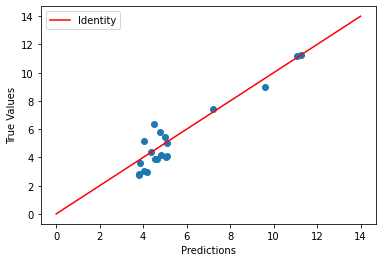

In [20]:
plt.scatter(svr_prediction, y_test)
plt.plot(np.arange(0,15),np.arange(0,15), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()

### Polynomical

In [21]:
gs.fit(x_train_poly_scaled, y_train)
svr_poly_prediction = gs.best_estimator_.predict(x_test_poly_scaled)
svrp_r2 = r2_score(y_true=y_test, y_pred=svr_poly_prediction)
svrp_mse = mean_squared_error(y_true=y_test, y_pred=svr_poly_prediction)
svrp_mae = mean_absolute_error(y_true=y_test, y_pred=svr_poly_prediction)
print(f'MSE: {svrp_mse:.6f}')

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    0.2s


MSE: 0.695635


[Parallel(n_jobs=3)]: Done 720 out of 720 | elapsed:    1.5s finished
C:\Users\Manuel\anaconda3\lib\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=25000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


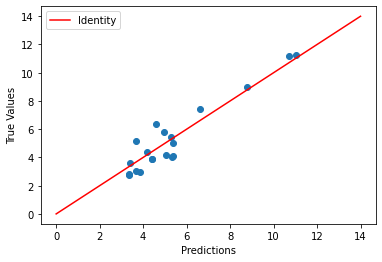

In [22]:
plt.scatter(svr_poly_prediction, y_test)
plt.plot(np.arange(0,15),np.arange(0,15), 'r', label='Identity') #Linea identidad (Predictions = True Values)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend()